# **Importing packages**

In [0]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
!pip install scikit-plot
import scikitplot as skplt

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from statsmodels.discrete.discrete_model import Logit
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score, StratifiedKFold, LeaveOneOut
from sklearn.metrics import accuracy_score,recall_score,confusion_matrix,classification_report,roc_auc_score,roc_curve, precision_score, f1_score
import sklearn as sk
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from decimal import Decimal

from google.colab import files

from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import OrdinalEncoder
from fancyimpute import KNN
from sklearn.impute import SimpleImputer

Using TensorFlow backend.


# **Data: Importing, Description & Preprocessing**

In [0]:
url = "https://raw.githubusercontent.com/Metricam/Internship_tasks/master/Startup_Success/data.csv"
missing_values = ["n/a", "na", "--", "No Info", "unknown amount"]
data = pd.read_csv(url, encoding='latin1', na_values=missing_values)

In [0]:
data.shape

(472, 116)

In [0]:
col_names=print(data.columns.tolist())

['Company_Name', 'Dependent-Company Status', 'year of founding', 'Age of company in years', 'Internet Activity Score', 'Short Description of company profile', 'Industry of company', 'Focus functions of company', 'Investors', 'Employee Count', 'Employees count MoM change', 'Has the team size grown', 'Est. Founding Date', 'Last Funding Date', 'Last Funding Amount', 'Country of company', 'Continent of company', 'Number of Investors in Seed', 'Number of Investors in Angel and or VC', 'Number of Co-founders', 'Number of of advisors', 'Team size Senior leadership', 'Team size all employees', 'Presence of a top angel or venture fund in previous round of investment', 'Number of of repeat investors', 'Number of  Sales Support material', 'Worked in top companies', 'Average size of companies worked for in the past', 'Have been part of startups in the past?', 'Have been part of successful startups in the past?', 'Was he or she partner in Big 5 consulting?', 'Consulting experience?', 'Product or se

In [0]:
data = data.rename({'Company_Name':'Name', 'Dependent-Company Status':'Status','year of founding':'foundation_year', 'Age of company in years':'age', 'Internet Activity Score':'internet_activity_score',  'Short Description of company profile':'description', 
                    'Industry of company':'industry', 'Focus functions of company':'functions', 'Investors':'investors','Employee Count':'employee_count', 'Employees count MoM change':'emp_count_mom', 'Has the team size grown':'change_team_size', 'Est. Founding Date':'funding_date', 
             'Last Funding Date': 'last_funding_date', 'Last Funding Amount':'funding_amount', 'Country of company': 'country', 'Continent of company': 'continent', 'Number of Investors in Seed':'investor_numbers_seed',  'Number of Investors in Angel and or VC':'investor_numbers_angel_vc', 'Number of Co-founders':'cofounder_numbers', 'Number of of advisors':'advisor_numbers', 'Team size Senior leadership':'team_size_senior', 'Team size all employees':'team_size_employees',
             'Presence of a top angel or venture fund in previous round of investment':'topangel_pres_prev_round', 'Number of of repeat investors':'repeat_investor_numbers', 'Number of  Sales Support material': 'sales_support_material_numbers', 'Worked in top companies': 'worked_top_company', 'Average size of companies worked for in the past': 'company_size_worked_past', 'Have been part of startups in the past?':'part_of_startup', 'Have been part of successful startups in the past?': 'part_of_successful_startup', 'Was he or she partner in Big 5 consulting?':'partner_big5_consulting', 'Consulting experience?':'consulting_exp', 'Product or service company?':'prod_or_serv', 
             'Catering to product/service across verticals':'catering_verticals', 'Focus on private or public data?':'private_or_public', 'Focus on consumer data?':'consumer_data', 'Focus on structured or unstructured data':'structured_or_not', 'Subscription based business':'subscription_based', 'Cloud or platform based serive/product?':'cloud_or_platform', 'Local or global player':'local_or_global', 'Linear or Non-linear business model':'linear_or_not', 'Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive':'capital_intensive_or_not', 'Number of  of Partners of company':'partner_numbers', 'Crowdsourcing based business':'crowdsourcing_based', 'Crowdfunding based business':'crowdfunding_based', 
             'Machine Learning based business': 'ml_based', 'Predictive Analytics business':'pred_analytics','Speech analytics business':'speech_analytics','Prescriptive analytics business':'prescriptive_analytics','Big Data Business':'big_data', 'Cross-Channel Analytics/ marketing channels':'cross_channel_analytics', 'Owns data or not? (monetization of data) e.g. Factual':'owns_data','Is the company an aggregator/market place? e.g. Bluekai':'is_aggregator', 'Online or offline venture - physical location based business or online venture?':'online_or_offline', 'B2C or B2B venture?':'b2c_or_b2b', "Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?":'forums_talks', 'Average Years of experience for founder and co founder':'years_of_exp_founder', 'Exposure across the globe':'exposure', 'Breadth of experience across verticals':'breadth_of_exp', 'Highest education':'education_lvl','Years of education':'education_years',
             'Specialization of highest education':'educ_spec', 'Relevance of education to venture':'educ_relevance', 'Relevance of experience to venture':'experience_relevance','Degree from a Tier 1 or Tier 2 university?':'degree_tier_uni', 'Renowned in professional circle':'prof_renowned', 'Experience in selling and building products':'selling_experience', 'Experience in Fortune 100 organizations':'fortune100_experience', 'Experience in Fortune 500 organizations':'fortune500_experience', 'Experience in Fortune 1000 organizations':'fortune1000_experience', 'Top management similarity':'management_sim', 'Number of Recognitions for Founders and Co-founders':'recognition_numbers', 'Number of  of Research publications':'research_pub_numbers',  
             'Skills score':'skill_score', 'Team Composition score':'team_composition_score', 'Dificulty of Obtaining Work force':'diff_obtaining_workforce', 'Pricing Strategy':'pricing_strategy', 'Hyper localisation':'hyper_local', 'Time to market service or product':'time_to_market', 'Employee benefits and salary structures':'emp_salary_structure', 'Long term relationship with other founders':'relationship_other_founders', 'Proprietary or patent position (competitive position)':'patent_position', 'Barriers of entry for the competitors':'competitor_entry_barriers', 'Company awards':'awards', 'Controversial history of founder or co founder':'founder_controversial_history', 
             'Legal risk and intellectual property':'IP', 'Client Reputation':'client_reputation', 'google page rank of company website':'page_rank', 'Technical proficiencies to analyse and interpret unstructured data':'prof_analyse_unstruc_data', 'Solutions offered':'solutions_offered', 'Invested through global incubation competitions?':'invested_through_incub_comp', 'Industry trend in investing':'industry_trend_in_investing','Disruptiveness of technology':'tech_disrupt','Number of Direct competitors':'direct_comp_numbers','Employees per year of company existence':'emp_numbers_per_year','Last round of funding received (in milionUSD)':'last_funding_usd','Survival through recession, based on existence of the company through recession times':'recession_survival','Time to 1st investment (in months)':'1st_investment_months',
             'Avg time to investment - average across all rounds, measured from previous investment':'avg_investment_time','Gartner hype cycle stage':'gartner_hype_stage','Time to maturity of technology (in years)':'tech_maturity_years','Percent_skill_Entrepreneurship':'entrep_skill','Percent_skill_Operations':'operations_skill', 'Percent_skill_Engineering':'engineering_skill', 'Percent_skill_Marketing':'marketing_skill','Percent_skill_Leadership':'leadership_skill', 'Percent_skill_Data Science':'ds_skill','Percent_skill_Business Strategy':'bus_strategy_skill','Percent_skill_Product Management':'prod_management_skill','Percent_skill_Sales':'sales_skill', 'Percent_skill_Domain':'domain_skill', 'Percent_skill_Law':'law_skill',
             'Percent_skill_Consulting':'consulting_skill', 'Percent_skill_Finance':'finance_skill', 'Percent_skill_Investment':'investment_skill','Renown score':'renown_score'},axis=1)  

In [0]:
data = data.drop(['Name', 'description', 'industry','investors','country','educ_spec', 'foundation_year','funding_date','last_funding_date','emp_count_mom'], axis=1)

In [0]:
data['functions'] = data['functions'].str.lower()
data['local_or_global'] = data['local_or_global'].str.lower()
data['cloud_or_platform'] = data['cloud_or_platform'].str.lower()
data['sales_support_material_numbers'] = data['sales_support_material_numbers'].str.lower()
data['change_team_size'] = data['change_team_size'].str.lower()
data['structured_or_not'].replace({'no':'Unstructured'},inplace=True)
data['local_or_global'].replace({'local  ':'local'},inplace=True)          

In [0]:
# Here I am making the "functions" variable into categories of four

sse = ['service', 'social network', 'entertainment','networking','consumer web', 'search','writing blog','media','publishing','elearning','video streaming','server design',
                                                              'mail reports','e-learning','customer servce','social news','community betterment','music','social','customer service','news','location based service','online music','n','many','\\']

it_data = ['technology','software service','app revenue','data driven applications','data integration','conssumer web','cloud computing','computing, training','computing','phone intelligence','search engine','mobile app development','search enginenoptimization','mobile app','game','web','curated web','software','security',
          'data visualization','music intelligece','games','it & sales','iphone apps','data collection','development tool','app','malware protection','personal apps','bug fix','network optimization','privacy' ,'software' ,'dashboards','software ','energy saving','wireless','application','data collection','tool','data collection ']

omfa = ['operations','analytics','operation','analtics','customer retention, customer feedback','customer analytics','crm','inventory management','reporting','operations, sales, marketing','data management','social media analytics','database management','analytic','research',
      'strategy','information management','customer engagement','optimization, crm, pricing','strategy, operations, finacial planning','management','travel planning','social tv analytics','intellectual property analysis and visualisation','social media management','big data analytics','web analytics','crm, marketing, human resources',
      'solution providing','analytics crowdsourcing','campaign management','retail','revenue maximization','recommendation','payment','enterprise','localized behaviour','metrics','pricing','risk','finance','global','targeting optimize','billing','recommendation ','strategy']

ms=['marketing','sales','marketing, sales','marketing & sales','sale','marketing \nsales','marketing, strategy','marketing,sales','marketing, customer targeting','sales, marketing','sales,marketing','social media marketing','marketing, technology, finance & accounting, customer service','marketing,sales,risk,operations','merchandising, marketing',
    'marketiing','mrkting','social branding','marketing, web analytics','sales, marketing and customer service','production,sales','targeted marketing','targeting','social media','advertising','social media optimization','sales & marketing','marketing, procurement, human resources','social advertising','operations, marketing','socialmedia campaign','development, marketing, and administration','data visualization, content marketing, presentations','ecommerce','social commerce','consumer behaviour']

def convert_sse(x):
  for name in x:
    data['functions'].replace({name:'social_service_entertainment'},inplace=True)

def convert_it_data(x):
  for name in x:
    data['functions'].replace({name:'it_data'},inplace=True)

def convert_omfa(x):
  for name in x:
    data['functions'].replace({name:'operations_management_finance_analytics'},inplace=True)

def convert_ms(x):
  for name in x:
    data['functions'].replace({name:'marketing_sales'},inplace=True)    

convert_sse(sse)  
convert_it_data(it_data)
convert_omfa(omfa)
convert_ms(ms)

In [0]:
data['functions'].value_counts()

operations_management_finance_analytics    178
marketing_sales                            140
it_data                                     81
social_service_entertainment                43
Name: functions, dtype: int64

In [0]:
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 2
Missing values: 7019
Single valued columns: Index([], dtype='object')


In [0]:
# As I saw there are lot of missing values, I decided to look more closely in which columns the missing data is.
def miss_val(data):
    x = ['column_name','missing_data','data_type']
    missing_data = pd.DataFrame(columns=x)
    columns = data.columns
    for col in columns:
        icolumn_name = col
        imissing_data = data[col].isnull().sum()
        idata_type = (data[col]).dtype
        if (imissing_data == 0):
          continue
        missing_data.loc[len(missing_data)] = [icolumn_name, imissing_data, idata_type]

    print(missing_data)

In [0]:
pd.set_option('display.max_rows', data.shape[0]+1)
mv = miss_val(data)
print(mv)

                        column_name missing_data data_type
0                               age           59   float64
1           internet_activity_score           65   float64
2                         functions           30    object
3                    employee_count          166   float64
4                  change_team_size           51    object
5                    funding_amount          160   float64
6                         continent           71    object
7             investor_numbers_seed           49   float64
8         investor_numbers_angel_vc           49   float64
9               team_size_employees           68   float64
10         topangel_pres_prev_round           97    object
11          repeat_investor_numbers           40   float64
12   sales_support_material_numbers           48    object
13               worked_top_company           19    object
14         company_size_worked_past           31    object
15                  part_of_startup           20    obje

## **Dealing with Missing Values**

In [0]:
data = data.astype(int, errors='ignore')

In [0]:
# imputing numeric columns with the corresponding column mean
numeric_cols=['age','internet_activity_score','employee_count','funding_amount','investor_numbers_seed','investor_numbers_angel_vc','team_size_employees', 'repeat_investor_numbers','education_years','fortune100_experience','fortune500_experience','fortune1000_experience',
'recognition_numbers','skill_score','page_rank','industry_trend_in_investing','direct_comp_numbers','emp_numbers_per_year','last_funding_usd','1st_investment_months','avg_investment_time', 'entrep_skill','operations_skill','engineering_skill','marketing_skill',
'leadership_skill','ds_skill','bus_strategy_skill','prod_management_skill','sales_skill','domain_skill','law_skill','consulting_skill','finance_skill','investment_skill','renown_score']

for column in numeric_cols:
  data[column].fillna(round((data[column]).mean()), inplace=True)

num_data = data[['age','internet_activity_score','employee_count','funding_amount','investor_numbers_seed','investor_numbers_angel_vc','team_size_employees', 'repeat_investor_numbers','education_years','fortune100_experience','fortune500_experience','fortune1000_experience',
'recognition_numbers','skill_score','page_rank','industry_trend_in_investing','direct_comp_numbers','emp_numbers_per_year','last_funding_usd','1st_investment_months','avg_investment_time', 'entrep_skill','operations_skill','engineering_skill','marketing_skill',
'leadership_skill','ds_skill','bus_strategy_skill','prod_management_skill','sales_skill','domain_skill','law_skill','consulting_skill','finance_skill','investment_skill','renown_score']]

num_data.shape

(472, 36)

In [0]:
# Encoding the categorical variables
encoder = OrdinalEncoder()

categoric_cols = ['Status','functions', 'change_team_size','continent','topangel_pres_prev_round','sales_support_material_numbers', 'worked_top_company','company_size_worked_past','part_of_startup','part_of_successful_startup',  
'partner_big5_consulting', 'consulting_exp', 'prod_or_serv','catering_verticals', 'private_or_public','consumer_data','structured_or_not','subscription_based','cloud_or_platform','local_or_global','linear_or_not',  
 'capital_intensive_or_not', 'partner_numbers', 'crowdsourcing_based','crowdfunding_based','ml_based','pred_analytics','speech_analytics', 'prescriptive_analytics','big_data','cross_channel_analytics', 'owns_data',
 'is_aggregator','online_or_offline','b2c_or_b2b','forums_talks','years_of_exp_founder', 'exposure', 'breadth_of_exp', 'education_lvl', 'educ_relevance','experience_relevance', 'degree_tier_uni', 'selling_experience',
 'management_sim','research_pub_numbers','team_composition_score','diff_obtaining_workforce', 'pricing_strategy','hyper_local', 'time_to_market','emp_salary_structure','relationship_other_founders', 'patent_position', 'competitor_entry_barriers', 'awards',
 'founder_controversial_history', 'IP','client_reputation','prof_analyse_unstruc_data','solutions_offered','invested_through_incub_comp', 'tech_disrupt', 'recession_survival', 'gartner_hype_stage','tech_maturity_years']

def encode(data):
    #retains only non-null values
    nonulls = np.array(data.dropna())
    #reshapes the data for encoding
    impute_reshape = nonulls.reshape(-1,1)
    #encode date
    impute_ordinal = encoder.fit_transform(impute_reshape)
    #Assign back encoded values to non-null values
    data.loc[data.notnull()] = np.squeeze(impute_ordinal)
    return data

for columns in categoric_cols:
    encode(data[columns])

In [0]:
cat_data = data[['Status','functions', 'change_team_size','continent','topangel_pres_prev_round','sales_support_material_numbers', 'worked_top_company','company_size_worked_past','part_of_startup','part_of_successful_startup',  
'partner_big5_consulting', 'consulting_exp', 'prod_or_serv','catering_verticals', 'private_or_public','consumer_data','structured_or_not','subscription_based','cloud_or_platform','local_or_global','linear_or_not',  
 'capital_intensive_or_not', 'partner_numbers', 'crowdsourcing_based','crowdfunding_based','ml_based','pred_analytics','speech_analytics', 'prescriptive_analytics','big_data','cross_channel_analytics', 'owns_data',
 'is_aggregator','online_or_offline','b2c_or_b2b','forums_talks','years_of_exp_founder', 'exposure', 'breadth_of_exp', 'education_lvl', 'educ_relevance','experience_relevance', 'degree_tier_uni', 'selling_experience',
 'management_sim','research_pub_numbers','team_composition_score','diff_obtaining_workforce', 'pricing_strategy','hyper_local', 'time_to_market','emp_salary_structure','relationship_other_founders', 'patent_position', 'competitor_entry_barriers', 'awards',
 'founder_controversial_history', 'IP','client_reputation','prof_analyse_unstruc_data','solutions_offered','invested_through_incub_comp', 'tech_disrupt', 'recession_survival', 'gartner_hype_stage','tech_maturity_years']]

cat_data = cat_data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [0]:
data = pd.concat([cat_data, num_data], axis=1)
print(data.shape)

(472, 102)


In [0]:
print("Missing values after filling NaN-s:", data.isna().sum().sum())

Missing values after filling NaN-s: 0


# **Correlations between variables**

In [0]:
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [0]:
data_cols = data.columns
col_len = len(data_cols)
num = 0
count=1
while (num < (col_len)):  
  num1=num+1
  while (num1 < (col_len)):
    if abs(correlation_ratio(data.iloc[:,num],data.iloc[:,num1])) > 0.8:
      print("#",count,"Correlation between", data.columns[num], "and", data.columns[num1],":",correlation_ratio(data.iloc[:,num],data.iloc[:,num1]).round(2))
      num1+=1
      count+=1
    else:
      num1 +=1
  num +=1
  num1=num+1

# 1 Correlation between part_of_startup and part_of_successful_startup : 0.83
# 2 Correlation between education_lvl and education_years : 0.92
# 3 Correlation between internet_activity_score and employee_count : 0.9
# 4 Correlation between internet_activity_score and investor_numbers_seed : 0.83
# 5 Correlation between internet_activity_score and investor_numbers_angel_vc : 0.81
# 6 Correlation between internet_activity_score and team_size_employees : 0.98
# 7 Correlation between internet_activity_score and repeat_investor_numbers : 0.81
# 8 Correlation between internet_activity_score and fortune100_experience : 0.8
# 9 Correlation between internet_activity_score and recognition_numbers : 0.86
# 10 Correlation between internet_activity_score and page_rank : 0.81
# 11 Correlation between internet_activity_score and direct_comp_numbers : 0.81
# 12 Correlation between internet_activity_score and emp_numbers_per_year : 0.98
# 13 Correlation between internet_activity_score and 1st_investmen

In [0]:
# mean of fortune 100, 500, 1000
fortune_col = data.loc[: , ['fortune100_experience','fortune500_experience','fortune1000_experience']]
data['fortune_experience_mean'] = fortune_col.mean(axis=1)

# dropping some variables
# I have dropped education years, as I think education level is much more descriptive...one could spend 10 years on eduction and still be with a bachelors degree
# I have dropped recognition numbers, because it was highly correlated with emp_numbeers_per_year, and the other variables showing the number of employees have already been dropped,
# so between the two the only viable option was to drop recognition_numbers
data = data.drop(['team_size_employees','funding_amount', 'fortune100_experience','fortune500_experience','fortune1000_experience','page_rank','internet_activity_score',
                    'employee_count','education_years','recognition_numbers','1st_investment_months','part_of_startup','law_skill'], axis=1)

In [0]:
# As we can see, we have no more pairs of variables between which correlation is more than 0.8
data_cols = data.columns
col_len = len(data_cols)
num = 0
count=1
while (num < (col_len)):  
  num1=num+1
  while (num1 < (col_len)):
    if abs(correlation_ratio(data.iloc[:,num],data.iloc[:,num1])) > 0.8:
      print("#",count,"Correlation between", data.columns[num], "and", data.columns[num1],":",correlation_ratio(data.iloc[:,num],data.iloc[:,num1]).round(2))
      num1+=1
      count+=1
    else:
      num1 +=1
  num +=1
  num1=num+1

# **Target split and Train-Test Split**

In [0]:
y = data["Status"]                       
x = data.drop(["Status"], axis=1)

In [0]:
# Train-Test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [0]:
x_train_index = x_train.index
x_test_index = x_test.index

# **Scaling: Normalization of Data**

In [0]:
numeric_x_train = x_train[['age','investor_numbers_seed','investor_numbers_angel_vc', 'repeat_investor_numbers', 'skill_score','industry_trend_in_investing','direct_comp_numbers','emp_numbers_per_year','last_funding_usd',
                           'avg_investment_time', 'entrep_skill','operations_skill','engineering_skill','marketing_skill', 'leadership_skill','ds_skill','bus_strategy_skill','prod_management_skill','sales_skill',
                           'domain_skill','consulting_skill','finance_skill','investment_skill','renown_score','fortune_experience_mean']]

numeric_x_test = x_test[['age','investor_numbers_seed','investor_numbers_angel_vc', 'repeat_investor_numbers', 'skill_score','industry_trend_in_investing','direct_comp_numbers','emp_numbers_per_year','last_funding_usd',
                         'avg_investment_time', 'entrep_skill','operations_skill','engineering_skill','marketing_skill', 'leadership_skill','ds_skill','bus_strategy_skill','prod_management_skill','sales_skill',
                         'domain_skill','consulting_skill','finance_skill','investment_skill','renown_score','fortune_experience_mean']]

In [0]:
scaler = RobustScaler()
numeric_x_train = scaler.fit_transform(numeric_x_train)
numeric_x_test = scaler.transform(numeric_x_test)

num_x_train = pd.DataFrame(numeric_x_train)
num_x_test = pd.DataFrame(numeric_x_test)

In [0]:
num_x_train.columns = [['age','investor_numbers_seed','investor_numbers_angel_vc', 'repeat_investor_numbers', 'skill_score','industry_trend_in_investing','direct_comp_numbers','emp_numbers_per_year','last_funding_usd',
                'avg_investment_time', 'entrep_skill','operations_skill','engineering_skill','marketing_skill', 'leadership_skill','ds_skill','bus_strategy_skill','prod_management_skill','sales_skill',
                'domain_skill','consulting_skill','finance_skill','investment_skill','renown_score','fortune_experience_mean']]

num_x_test.columns = [['age','investor_numbers_seed','investor_numbers_angel_vc', 'repeat_investor_numbers', 'skill_score','industry_trend_in_investing','direct_comp_numbers','emp_numbers_per_year','last_funding_usd',
               'avg_investment_time', 'entrep_skill','operations_skill','engineering_skill','marketing_skill', 'leadership_skill','ds_skill','bus_strategy_skill','prod_management_skill','sales_skill',
               'domain_skill','consulting_skill','finance_skill','investment_skill','renown_score','fortune_experience_mean']]

In [0]:
num_x_train.index = x_train_index
num_x_test.index = x_test_index

In [0]:
cat_x_train = x_train[['functions', 'change_team_size','continent','topangel_pres_prev_round','sales_support_material_numbers', 'worked_top_company','company_size_worked_past','part_of_successful_startup',  
              'partner_big5_consulting', 'consulting_exp', 'prod_or_serv','catering_verticals', 'private_or_public','consumer_data','structured_or_not','subscription_based','cloud_or_platform','local_or_global','linear_or_not',  
              'capital_intensive_or_not', 'partner_numbers', 'crowdsourcing_based','crowdfunding_based','ml_based','pred_analytics','speech_analytics', 'prescriptive_analytics','big_data','cross_channel_analytics', 'owns_data',
              'is_aggregator','online_or_offline','b2c_or_b2b','forums_talks','years_of_exp_founder', 'exposure', 'breadth_of_exp', 'education_lvl', 'educ_relevance','experience_relevance', 'degree_tier_uni', 'selling_experience',
              'management_sim','research_pub_numbers','team_composition_score','diff_obtaining_workforce', 'pricing_strategy','hyper_local', 'time_to_market','emp_salary_structure','relationship_other_founders', 'patent_position', 
              'competitor_entry_barriers', 'awards','founder_controversial_history', 'IP','client_reputation','prof_analyse_unstruc_data','solutions_offered','invested_through_incub_comp', 'tech_disrupt', 'recession_survival', 
              'gartner_hype_stage','tech_maturity_years']]

cat_x_test = x_test[['functions', 'change_team_size','continent','topangel_pres_prev_round','sales_support_material_numbers', 'worked_top_company','company_size_worked_past','part_of_successful_startup',  
              'partner_big5_consulting', 'consulting_exp', 'prod_or_serv','catering_verticals', 'private_or_public','consumer_data','structured_or_not','subscription_based','cloud_or_platform','local_or_global','linear_or_not',  
              'capital_intensive_or_not', 'partner_numbers', 'crowdsourcing_based','crowdfunding_based','ml_based','pred_analytics','speech_analytics', 'prescriptive_analytics','big_data','cross_channel_analytics', 'owns_data',
              'is_aggregator','online_or_offline','b2c_or_b2b','forums_talks','years_of_exp_founder', 'exposure', 'breadth_of_exp', 'education_lvl', 'educ_relevance','experience_relevance', 'degree_tier_uni', 'selling_experience',
              'management_sim','research_pub_numbers','team_composition_score','diff_obtaining_workforce', 'pricing_strategy','hyper_local', 'time_to_market','emp_salary_structure','relationship_other_founders', 'patent_position', 
              'competitor_entry_barriers', 'awards','founder_controversial_history', 'IP','client_reputation','prof_analyse_unstruc_data','solutions_offered','invested_through_incub_comp', 'tech_disrupt', 'recession_survival', 
              'gartner_hype_stage','tech_maturity_years']]

In [0]:
x_train = pd.concat([num_x_train, cat_x_train], axis=1)
x_test = pd.concat([num_x_test, cat_x_test], axis=1)

# **Models**

## **Logistic Regression**

In [0]:
logit=LogisticRegression(random_state=42).fit(x_train,y_train)

y_train_logit = logit.predict(x_train)
y_test_logit = logit.predict(x_test) 

y_train_hat = logit.predict_proba(x_train)[:,1]
y_test_hat = logit.predict_proba(x_test)[:,1]

results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_logit)*100,accuracy_score(y_test,y_test_logit)*100],
                              "ROC_AUC":[roc_auc_score(y_train,y_train_hat)*100,roc_auc_score(y_test,y_test_hat)*100],
                              "Recall":[recall_score(y_train, y_train_logit)*100,recall_score(y_test, y_test_logit)*100],
                              "Precision":[precision_score(y_train, y_train_logit)*100,precision_score(y_test, y_test_logit)*100],
                              "f1_score":[f1_score(y_train, y_train_logit)*100,f1_score(y_test, y_test_logit)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,98.143236,99.880228,99.176955,97.967480,98.568507
Testing set,77.894737,85.581623,77.419355,87.272727,82.051282


In [0]:
param_logit={'class_weight':[None,'balanced'],
            'C':np.linspace(0.0001,10,400),
            'penalty': ['l1','l2', "elasticnet"]}

gs_logit = GridSearchCV(estimator=logit,
                        param_grid=param_logit,
                        cv=5,scoring='roc_auc',verbose=1,n_jobs=-1).fit(x_train, y_train)

gs_logit.best_params_

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 2730 tasks      | elapsed:   27.4s
[Parallel(n_jobs=-1)]: Done 6730 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 12000 out of 12000 | elapsed:  1.9min finished


{'C': 0.22566165413533834, 'class_weight': None, 'penalty': 'l2'}

In [0]:
logit2=LogisticRegression(class_weight=None, penalty='l2',C=0.005,random_state=42).fit(x_train,y_train)

y_train_logit2 = logit2.predict(x_train)
y_test_logit2 = logit2.predict(x_test) 

y_train_hat2 = logit2.predict_proba(x_train)[:,1]
y_test_hat2 = logit2.predict_proba(x_test)[:,1]

results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_logit2)*100,accuracy_score(y_test,y_test_logit2)*100],
                              "ROC_AUC":[roc_auc_score(y_train,y_train_hat2)*100,roc_auc_score(y_test,y_test_hat2)*100],
                              "Recall":[recall_score(y_train, y_train_logit2)*100,recall_score(y_test, y_test_logit2)*100],
                              "Precision":[precision_score(y_train, y_train_logit2)*100,precision_score(y_test, y_test_logit2)*100],
                              "f1_score":[f1_score(y_train, y_train_logit2)*100,f1_score(y_test, y_test_logit2)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,89.389920,96.692464,97.942387,87.179487,92.248062
Testing set,76.842105,84.555230,82.258065,82.258065,82.258065


In [0]:
logit_coefs = pd.DataFrame(sorted(list(zip(x.columns, logit2.coef_[0])),
                                   key=(lambda x: x[1]),
                                   reverse=True),
                            columns=['Feature', 'Coefficient'])
logit_coefs[0:20]

,Feature,Coefficient
0,pred_analytics,0.121862
1,investment_skill,0.102108
2,direct_comp_numbers,0.100795
3,sales_skill,0.093894
4,competitor_entry_barriers,0.092017
5,change_team_size,0.081759
6,subscription_based,0.073891
7,partner_numbers,0.072702
8,prescriptive_analytics,0.071266
9,renown_score,0.071106


In [0]:
# Youden's index gives the most optimal threshold to maximize both recall and precision measures
fpr,tpr,thresholds = roc_curve(y_test,y_test_hat2)
optimal = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal]
print(optimal_threshold)

0.5441317144982112


In [0]:
logit3=LogisticRegression(class_weight=None, penalty='l2',C=0.005,random_state=42).fit(x_train,y_train)

y_train_logit3 = logit3.predict(x_train)
y_test_logit3 = logit3.predict(x_test) 

y_train_hat3 = (logit3.predict_proba(x_train)[:,1] >= 0.5441317144982112).astype(int)
y_test_hat3 = (logit3.predict_proba(x_test)[:,1] >=0.5441317144982112).astype(int)

results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_logit3)*100,accuracy_score(y_test,y_test_logit3)*100],
                              "ROC_AUC":[roc_auc_score(y_train,y_train_hat3)*100,roc_auc_score(y_test,y_test_hat3)*100],
                              "Recall":[recall_score(y_train, y_train_logit3)*100,recall_score(y_test, y_test_logit3)*100],
                              "Precision":[precision_score(y_train, y_train_logit3)*100,precision_score(y_test, y_test_logit3)*100],
                              "f1_score":[f1_score(y_train, y_train_logit3)*100,f1_score(y_test, y_test_logit3)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,89.389920,90.852835,97.942387,87.179487,92.248062
Testing set,76.842105,78.103617,82.258065,82.258065,82.258065


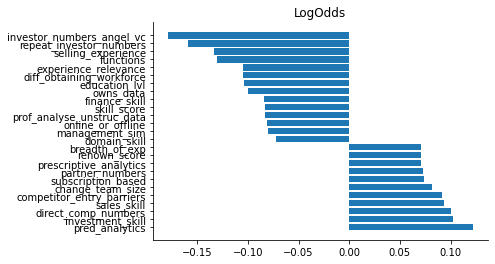

In [0]:
lg_coefs = list(zip(x.columns, logit2.coef_[0]))
lg_coefs_df = pd.DataFrame(lg_coefs)
lg_top_coefs = [x for x in lg_coefs if np.abs(x[1]) > .07]
lg_top_coefs = sorted(lg_top_coefs, key=(lambda x: x[1]), reverse=True)
lg_top_coefs_df = pd.DataFrame(lg_top_coefs)


plt.barh([x[0] for x in lg_top_coefs], width=[x[1] for x in lg_top_coefs])
plt.title('LogOdds')
plt.grid(b=False)
sns.despine()

In [0]:
fpr_lg, tpr_lg, thresholds_lg = roc_curve(y_test,y_test_hat2)

## **Decision Tree**

In [0]:
tree = DecisionTreeClassifier(random_state=42).fit(x_train,y_train)

y_train_tree = tree.predict(x_train)
y_test_tree = tree.predict(x_test)

tree_train_hat = tree.predict_proba(x_train)[:,1]
tree_test_hat = tree.predict_proba(x_test)[:,1]

results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_tree)*100,accuracy_score(y_test,y_test_tree)*100],
                              "ROC_AUC":[roc_auc_score(y_train,tree_train_hat)*100,roc_auc_score(y_test,tree_test_hat)*100],
                              "Recall":[recall_score(y_train, y_train_tree)*100,recall_score(y_test, y_test_tree)*100],
                              "Precision":[precision_score(y_train, y_train_tree)*100,precision_score(y_test, y_test_tree)*100],
                              "f1_score":[f1_score(y_train, y_train_tree)*100,f1_score(y_test, y_test_tree)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,100.000000,100.00000,100.000000,100.000000,100.000000
Testing set,86.315789,85.26393,88.709677,90.163934,89.430894


In [0]:
param_dt={"max_depth":range(1,20),
          "min_samples_leaf":range(10,300,10),
          "class_weight":["balanced",None]        
            }

gs_dt=GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), param_grid=param_dt,
                  scoring="roc_auc",cv=5).fit(x_train,y_train)

gs_dt.best_params_

{'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 10}

In [0]:
tree2 = DecisionTreeClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=10, random_state=42).fit(x_train,y_train)

y_train_tree2 = tree2.predict(x_train)
y_test_tree2 = tree2.predict(x_test)

tree_train_hat2 = (tree2.predict_proba(x_train)[:,1] >=0.7).astype(int)
tree_test_hat2 = (tree2.predict_proba(x_test)[:,1] >=0.7).astype(int)

results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_tree2)*100,accuracy_score(y_test,y_test_tree2)*100],
                              "ROC_AUC":[roc_auc_score(y_train,tree_train_hat2)*100,roc_auc_score(y_test,tree_test_hat2)*100],
                              "Recall":[recall_score(y_train, y_train_tree2)*100,recall_score(y_test, y_test_tree2)*100],
                              "Precision":[precision_score(y_train, y_train_tree2)*100,precision_score(y_test, y_test_tree2)*100],
                              "f1_score":[f1_score(y_train, y_train_tree2)*100,f1_score(y_test, y_test_tree2)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,92.572944,91.846324,91.358025,96.943231,94.067797
Testing set,84.210526,81.744868,80.645161,94.339623,86.956522


In [0]:
feature_importances_dt = pd.DataFrame({'Features': x_train.columns,'importance':tree2.feature_importances_,}).sort_values('importance', ascending=False)
feature_importances_dt[0:10]

,Features,importance
66,selling_experience,0.326342
7,"(emp_numbers_per_year,)",0.284556
86,recession_survival,0.134679
29,sales_support_material_numbers,0.086643
57,b2c_or_b2b,0.052593
39,structured_or_not,0.045220
71,pricing_strategy,0.027385
41,cloud_or_platform,0.024732
9,"(avg_investment_time,)",0.014480
21,"(finance_skill,)",0.002859


In [0]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test,tree_test_hat)

## **Random Forest**

In [0]:
rf=RandomForestClassifier(random_state=42).fit(x_train,y_train)

y_train_rf = rf.predict(x_train)
y_test_rf = rf.predict(x_test)

rf_train_hat = rf.predict_proba(x_train)[:,1]
rf_test_hat = rf.predict_proba(x_test)[:,1]

results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_rf)*100,accuracy_score(y_test,y_test_rf)*100],
                              "ROC_AUC":[roc_auc_score(y_train,rf_train_hat)*100,roc_auc_score(y_test,rf_test_hat)*100],
                              "Recall":[recall_score(y_train, y_train_rf)*100,recall_score(y_test, y_test_rf)*100],
                              "Precision":[precision_score(y_train, y_train_rf)*100,precision_score(y_test, y_test_rf)*100],
                              "f1_score":[f1_score(y_train, y_train_rf)*100,f1_score(y_test, y_test_rf)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,100.000000,100.000000,100.000000,100.000000,100.000000
Testing set,90.526316,95.503421,91.935484,93.442623,92.682927


In [0]:
gs_rf = GridSearchCV(estimator=rf, param_grid=param_dt, scoring="roc_auc", cv=3, n_jobs=-1).fit(x_train,y_train)

gs_rf.best_params_

{'class_weight': 'balanced', 'max_depth': 7, 'min_samples_leaf': 10}

In [0]:
rf2=RandomForestClassifier(class_weight='balanced', max_depth=7, min_samples_leaf=10, random_state=42).fit(x_train,y_train)

y_train_rf2 = rf2.predict(x_train)
y_test_rf2 = rf2.predict(x_test)

rf_train_hat2 = rf2.predict_proba(x_train)[:,1]
rf_test_hat2 = rf2.predict_proba(x_test)[:,1]

results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_rf2)*100,accuracy_score(y_test,y_test_rf2)*100],
                              "ROC_AUC":[roc_auc_score(y_train,rf_train_hat2)*100,roc_auc_score(y_test,rf_test_hat2)*100],
                              "Recall":[recall_score(y_train, y_train_rf2)*100,recall_score(y_test, y_test_rf2)*100],
                              "Precision":[precision_score(y_train, y_train_rf2)*100,precision_score(y_test, y_test_rf2)*100],
                              "f1_score":[f1_score(y_train, y_train_rf2)*100,f1_score(y_test, y_test_rf2)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,94.429708,98.894417,95.061728,96.250000,95.652174
Testing set,82.105263,94.672532,80.645161,90.909091,85.470085


In [0]:
feature_importances_rf = pd.DataFrame({'Features': x_train.columns,'importance': rf2.feature_importances_}).sort_values('importance', ascending=False)
feature_importances_rf

feature_importances_rf[0:20]

,Features,importance
67,management_sim,0.085920
66,selling_experience,0.074245
39,structured_or_not,0.064020
0,"(age,)",0.060996
70,diff_obtaining_workforce,0.056910
52,big_data,0.051214
82,prof_analyse_unstruc_data,0.043717
24,"(fortune_experience_mean,)",0.032606
7,"(emp_numbers_per_year,)",0.030650
15,"(ds_skill,)",0.026471


In [0]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test,rf_test_hat2)

## **Naive Bayes**

In [0]:
nb = BernoulliNB().fit(x_train, y_train)

y_train_nb = nb.predict(x_train)
y_test_nb = nb.predict(x_test)

nb_train_hat = nb.predict_proba(x_train)[:,1]
nb_test_hat = nb.predict_proba(x_test)[:,1]

results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_nb)*100,accuracy_score(y_test,y_test_nb)*100],
                              "ROC_AUC":[roc_auc_score(y_train,nb_train_hat)*100,roc_auc_score(y_test,nb_test_hat)*100],
                              "Recall":[recall_score(y_train, y_train_nb)*100,recall_score(y_test, y_test_nb)*100],
                              "Precision":[precision_score(y_train, y_train_nb)*100,precision_score(y_test, y_test_nb)*100],
                              "f1_score":[f1_score(y_train, y_train_nb)*100,f1_score(y_test, y_test_nb)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,88.859416,94.644064,90.946502,91.701245,91.322314
Testing set,82.105263,93.401760,80.645161,90.909091,85.470085


In [0]:
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test,nb_test_hat)

## **Support Vector Machines**

In [0]:
svm = svm.SVC(kernel="linear", probability=True).fit(x_train,y_train)

y_train_svm = svm.predict(x_train)
y_test_svm = svm.predict(x_test)

svm_train_hat = svm.predict_proba(x_train)[:,1]
svm_test_hat = svm.predict_proba(x_test)[:,1]

results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_svm)*100,accuracy_score(y_test,y_test_svm)*100],
                              "ROC_AUC":[roc_auc_score(y_train,svm_train_hat)*100,roc_auc_score(y_test,svm_test_hat)*100],
                              "Recall":[recall_score(y_train, y_train_svm)*100,recall_score(y_test, y_test_svm)*100],
                              "Precision":[precision_score(y_train, y_train_svm)*100,precision_score(y_test, y_test_svm)*100],
                              "f1_score":[f1_score(y_train, y_train_svm)*100,f1_score(y_test, y_test_svm)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,99.734748,100.000000,100.000000,99.590164,99.794661
Testing set,74.736842,82.942326,74.193548,85.185185,79.310345


In [0]:
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test,svm_test_hat)

## **XGBoost**

In [0]:
xgb = XGBClassifier().fit(x_train,y_train)

y_train_xgb = xgb.predict(x_train)
y_test_xgb = xgb.predict(x_test)

xgb_train_hat = xgb.predict_proba(x_train)[:,1]
xgb_test_hat = xgb.predict_proba(x_test)[:,1]

results_summary=pd.DataFrame({"Accuracy":[accuracy_score(y_train,y_train_xgb)*100,accuracy_score(y_test,y_test_xgb)*100],
                              "ROC_AUC":[roc_auc_score(y_train,xgb_train_hat)*100,roc_auc_score(y_test,xgb_test_hat)*100],
                              "Recall":[recall_score(y_train, y_train_xgb)*100,recall_score(y_test, y_test_xgb)*100],
                              "Precision":[precision_score(y_train, y_train_xgb)*100,precision_score(y_test, y_test_xgb)*100],
                              "f1_score":[f1_score(y_train, y_train_xgb)*100,f1_score(y_test, y_test_xgb)*100]
                              },
                             index=["Training set","Testing set"])
results_summary

,Accuracy,ROC_AUC,Recall,Precision,f1_score
Training set,99.734748,100.000000,99.588477,100.000000,99.793814
Testing set,87.368421,93.059629,88.709677,91.666667,90.163934


In [0]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test,xgb_test_hat)

## **Model Comparisons**

In [0]:
print("Mean 10-fold ROC_AUC score for Tuned LOGIT",np.mean(cross_val_score(estimator=logit2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="roc_auc",n_jobs=-1))*100)
print("Mean 10-fold ROC_AUC score for Tuned DT",np.mean(cross_val_score(estimator=tree2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="roc_auc",n_jobs=-1))*100)
print("Mean 10-fold ROC_AUC score for Tuned RF",np.mean(cross_val_score(estimator=rf2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="roc_auc", n_jobs=-1))*100)
print("Mean 10-fold ROC_AUC score for Tuned XGBoost",np.mean(cross_val_score(estimator=xgb,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="roc_auc",n_jobs=-1))*100)
print("Mean 10-fold ROC_AUC score for Tuned SVM",np.mean(cross_val_score(estimator=svm,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="roc_auc",n_jobs=-1))*100)
print("Mean 10-fold ROC_AUC score for Tuned NB",np.mean(cross_val_score(estimator=nb,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="roc_auc",n_jobs=-1))*100)
print("Mean 10-fold RECALL score for Tuned LOGIT",np.mean(cross_val_score(estimator=logit2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True, random_state=42), scoring="recall",n_jobs=-1))*100)
print("Mean 19-fold RECALL score for Tuned DT",np.mean(cross_val_score(estimator=tree2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="recall",n_jobs=-1))*100)
print("Mean 10-fold RECALL score for Tuned RF",np.mean(cross_val_score(estimator=rf2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="recall",n_jobs=-1))*100)
print("Mean 10-fold RECALL score for Tuned XGBoost",np.mean(cross_val_score(estimator=xgb,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="recall",n_jobs=-1))*100)
print("Mean 10-fold RECALL score for Tuned SVM",np.mean(cross_val_score(estimator=svm,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="recall",n_jobs=-1))*100)
print("Mean 10-fold RECALL score for Tuned NB",np.mean(cross_val_score(estimator=nb,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="recall",n_jobs=-1))*100)
print("Mean 10-fold PRECISION score for Tuned LOGIT",np.mean(cross_val_score(estimator=logit2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="precision",n_jobs=-1))*100)
print("Mean 10-fold PRECISION score for Tuned DT",np.mean(cross_val_score(estimator=tree2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="precision",n_jobs=-1))*100)
print("Mean 10-fold PRECISION score for Tuned RF",np.mean(cross_val_score(estimator=rf2,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="precision",n_jobs=-1))*100)
print("Mean 10-fold PRECISION score for Tuned XGBoost",np.mean(cross_val_score(estimator=xgb,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="precision",n_jobs=-1))*100)
print("Mean 10-fold PRECISION score for Tuned SVM",np.mean(cross_val_score(estimator=svm,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="precision",n_jobs=-1))*100)
print("Mean 10-fold PRECISION score for Tuned NB",np.mean(cross_val_score(estimator=nb,X=x,y=y,cv=StratifiedKFold(n_splits=10,shuffle=True,random_state=42), scoring="precision",n_jobs=-1))*100)

Mean 10-fold ROC_AUC score for Tuned LOGIT 91.96030993042378
Mean 10-fold ROC_AUC score for Tuned DT 88.20339184060721
Mean 10-fold ROC_AUC score for Tuned RF 95.31854838709677
Mean 10-fold ROC_AUC score for Tuned XGBoost 95.37310246679317
Mean 10-fold ROC_AUC score for Tuned SVM 92.67868437697659
Mean 10-fold ROC_AUC score for Tuned NB 92.82708728652752
Mean 10-fold RECALL score for Tuned LOGIT 93.74193548387098
Mean 19-fold RECALL score for Tuned DT 83.9247311827957
Mean 10-fold RECALL score for Tuned RF 94.0752688172043
Mean 10-fold RECALL score for Tuned XGBoost 94.0752688172043
Mean 10-fold RECALL score for Tuned SVM 87.80645161290322
Mean 10-fold RECALL score for Tuned NB 87.87096774193547
Mean 10-fold PRECISION score for Tuned LOGIT 85.10192258721669
Mean 10-fold PRECISION score for Tuned DT 89.92679437366343
Mean 10-fold PRECISION score for Tuned RF 88.79012603625736
Mean 10-fold PRECISION score for Tuned XGBoost 90.36061392568622
Mean 10-fold PRECISION score for Tuned SVM 91.5

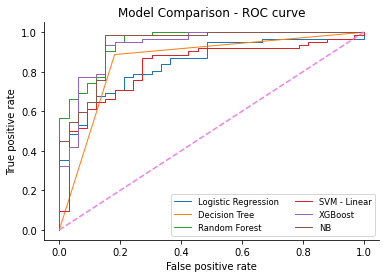

In [0]:
plt.plot(fpr_lg, tpr_lg, lw=1, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, lw=1, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, lw=1, label='Random Forest')
plt.plot(fpr_svm, tpr_svm, lw=1, label='SVM - Linear')
plt.plot(fpr_xgb, tpr_xgb, lw=1, label='XGBoost')
plt.plot(fpr_nb, tpr_nb, lw=1, label='NB')

plt.plot([0, 1], [0, 1], c='violet', ls='--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Model Comparison - ROC curve')
plt.legend(ncol=2, fontsize='small')
plt.savefig("Model_Comparison.jpg")
files.download("Model_Comparison.jpg")
sns.despine()